In [16]:
import numpy as np
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

In [17]:

def generer_vecteur_Y(n, p, theta, sigma):
    X = np.random.normal(0, 1, (n, p))
    epsilon = np.random.normal(0, sigma, n)
    Y = np.dot(X, theta) + epsilon
    return X, Y

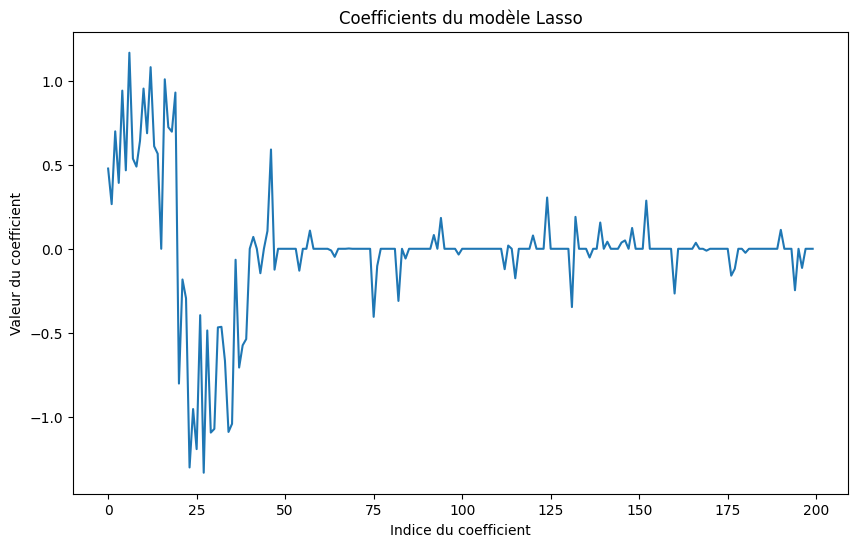

In [18]:
n = 100
p = 200
sigma = 0.5
s = 40 
theta = np.array([1] * (s // 2) + [-1] * (s // 2) + [0] * (p - s))
X, Y = generer_vecteur_Y(n, p, theta, sigma)
lasso_model = Lasso(alpha=0.1)   
lasso_model.fit(X, Y)
plt.figure(figsize=(10, 6))
plt.plot(lasso_model.coef_)
plt.title("Coefficients du modèle Lasso")
plt.xlabel("Indice du coefficient")
plt.ylabel("Valeur du coefficient")
plt.show()



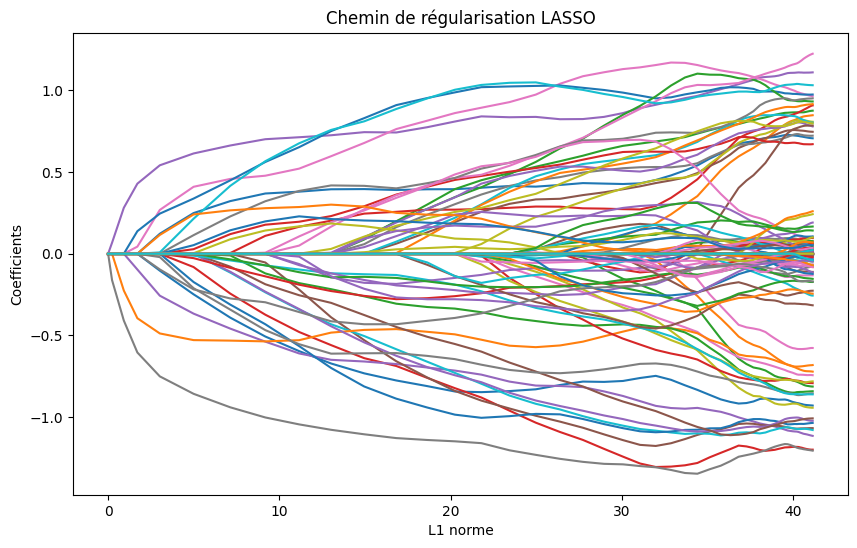

In [77]:

from sklearn.linear_model import lasso_path


alphas, coefs, _ = lasso_path(X, Y, alphas=np.logspace(-5, 1, 100))
L1norm=[sum(np.abs(i)) for i in coefs.transpose()]
plt.figure(figsize=(10, 6))
for coef in coefs:
    plt.plot(L1norm, coef) #alphas, coef)
plt.xlabel('L1 norme')
plt.ylabel('Coefficients')
plt.title('Chemin de régularisation LASSO')
#plt.xscale('log')
plt.axis('tight')
plt.show()

In [78]:

alpha_specifique = 0.1
lasso_specifique = Lasso(alpha=alpha_specifique)
lasso_specifique.fit(X, Y)
estimated_theta_specific = lasso_specifique.coef_
print(estimated_theta_specific)


[ 4.77690256e-01  2.65810123e-01  6.99249356e-01  3.92348476e-01
  9.41722670e-01  4.67252165e-01  1.16739202e+00  5.36866074e-01
  4.89425585e-01  6.42658611e-01  9.53975227e-01  6.87957227e-01
  1.08142453e+00  6.10517843e-01  5.66033607e-01  0.00000000e+00
  1.00912924e+00  7.23898651e-01  6.97287654e-01  9.30216135e-01
 -8.02466695e-01 -1.82745051e-01 -2.94457487e-01 -1.30208114e+00
 -9.54118508e-01 -1.19279493e+00 -3.95293308e-01 -1.33330070e+00
 -4.86291339e-01 -1.09435132e+00 -1.07227257e+00 -4.67972618e-01
 -4.64608418e-01 -6.67642212e-01 -1.09052575e+00 -1.04203820e+00
 -6.52358985e-02 -7.07105200e-01 -5.74719956e-01 -5.37540049e-01
  0.00000000e+00  7.07042055e-02  0.00000000e+00 -1.45441641e-01
 -0.00000000e+00  1.06135091e-01  5.91172945e-01 -1.24198915e-01
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -1.30234977e-01 -0.00000000e+00
 -0.00000000e+00  1.08382931e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

In [79]:
nx = np.random.normal(0, 1, (1, p))

In [80]:
nx= list(nx)[0]

In [81]:
nxx= list(nx)

In [82]:
len(nxx)

200

In [83]:
predictions = lasso_specifique.predict(np.array(nxx).reshape(1, -1))


In [84]:
print(predictions)

[-2.98248132]


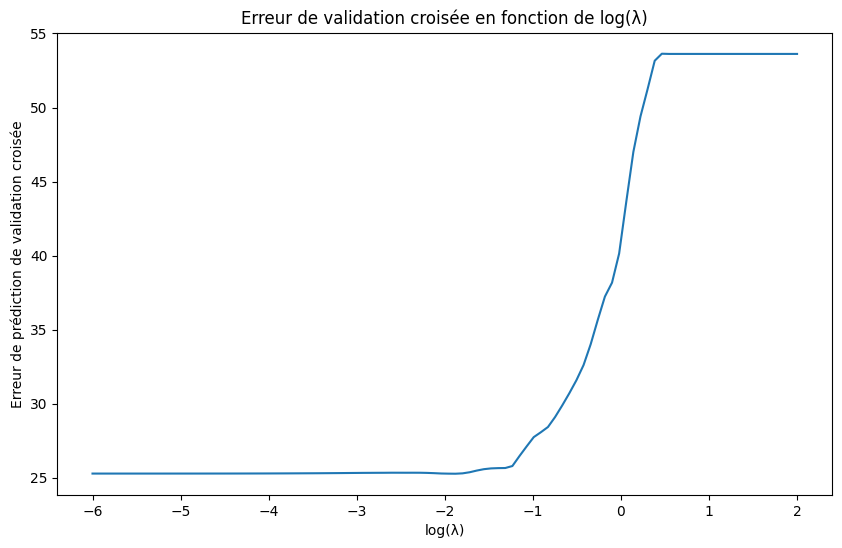

λ.min (meilleur alpha) : 0.013219411484660314
λ.1se : 0.013219411484660314


In [85]:
#  Question 7
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt


lasso_cv = LassoCV(alphas=np.logspace(-6, 2, 100), cv=5) 
lasso_cv.fit(X, Y)
plt.figure(figsize=(10, 6))
mse_path = lasso_cv.mse_path_.mean(axis=1)
plt.plot(np.log10(lasso_cv.alphas_), mse_path)
plt.xlabel('log(λ)')
plt.ylabel('Erreur de prédiction de validation croisée')
plt.title('Erreur de validation croisée en fonction de log(λ)')
plt.show()
lambda_min = lasso_cv.alpha_
print(f"λ.min (meilleur alpha) : {lambda_min}")
idx_lambda_1se = np.argmin(mse_path + np.std(lasso_cv.mse_path_, axis=1))
lambda_1se = lasso_cv.alphas_[idx_lambda_1se]
print(f"λ.1se : {lambda_1se}")


 λ.min est le λ qui minimise l'erreur de validation croisée, tandis que λ.1se est le λ le plus grand qui est encore dans une déviation standard simple de l'erreur minimale, offrant souvent un modèle plus simple ou plus régularisé avec des performances comparables.







In [86]:
n_test = 100  
X_test, Y_test = generer_vecteur_Y(n_test, p, theta, sigma) 




In [88]:
Ypredict = lasso_specifique.predict(X_test)

In [91]:
from sklearn.metrics import mean_squared_error
mse_test = mean_squared_error(Y_test, Ypredict)
print(f"MSE empirique sur l'échantillon test : {mse_test}")

MSE empirique sur l'échantillon test : 9.814258900132227


In [92]:
modelLasso=Lasso(alpha= 0.013)
modelLasso.fit(X, Y)

Lasso(alpha=0.013)

In [93]:
predictY=modelLasso.predict(X_test)
mse_test = mean_squared_error(Y_test, predictY)
print(f"MSE empirique sur l'échantillon test : {mse_test}")

MSE empirique sur l'échantillon test : 2.22361654743173


In [97]:
Xrep , Yrep = generer_vecteur_Y(n_test, p, np.random.normal(0, 2, p), 2) 

In [98]:
Xrep

array([[ 0.60584076,  0.53737635,  0.80366169, ...,  0.9304586 ,
         0.50460057,  1.30069569],
       [ 2.29874844, -1.26368087, -0.19107363, ...,  0.264538  ,
         0.7093449 ,  0.40986363],
       [-0.04606938,  0.91771376,  0.2541429 , ..., -0.36946053,
        -0.35849207, -0.71439162],
       ...,
       [-0.9066947 , -0.41597846, -1.35337631, ..., -1.49898287,
         1.18835152,  1.11996971],
       [ 1.13082306, -0.42026751,  0.15404893, ...,  0.50290292,
        -0.35879059, -0.01452414],
       [ 0.22239646, -1.05202785,  0.10528921, ...,  0.99363021,
         1.09957473,  1.63313412]])

In [99]:
Yrep

array([ 1.21165110e+01, -3.99747873e+01,  1.80907122e+01, -1.88168751e+01,
        1.39892912e+01,  2.87449797e+01,  2.05375592e+01, -2.92247899e+01,
       -2.31067918e+01, -2.73959728e+00,  1.56578502e+00, -1.57763640e+01,
       -1.22865857e+01,  1.91916289e+01, -1.55462470e+01,  3.14558080e+01,
        3.57027505e+00,  1.98429717e+01,  3.87948667e+01,  1.36926035e+00,
       -1.77203758e+01, -1.79521880e+01, -1.07208924e+01,  1.30190924e+01,
        3.11243337e+01, -5.71132793e+01,  7.66495474e+00, -3.47370099e+01,
       -3.32470484e+00, -3.32364950e+01,  3.12860050e+01,  4.22358473e+01,
        7.68582696e+00,  1.65405407e+01, -2.29044129e+01,  1.81311705e+01,
       -2.20424906e+01, -1.57076585e+01,  3.28711801e+00, -2.77308791e+01,
        2.65939850e+01,  2.45946755e+01, -1.39659358e+01, -5.48291791e+00,
        1.28017479e-02, -1.17605256e+01,  3.06493665e+01,  1.46994572e+01,
        5.22940847e+00, -4.69719165e+01, -2.34029953e+01,  2.19814689e+01,
       -3.33506678e+01,  